__1. Object Detection using H,S,V__

H-Hue (0-360: Red, Yellow, Green, Cyan, Blue, Magenta), S-Saturation (0-100 %: depth of pigment/dominance of hue), V-Value (0-100%: Brightness), Seperates luminance from color information
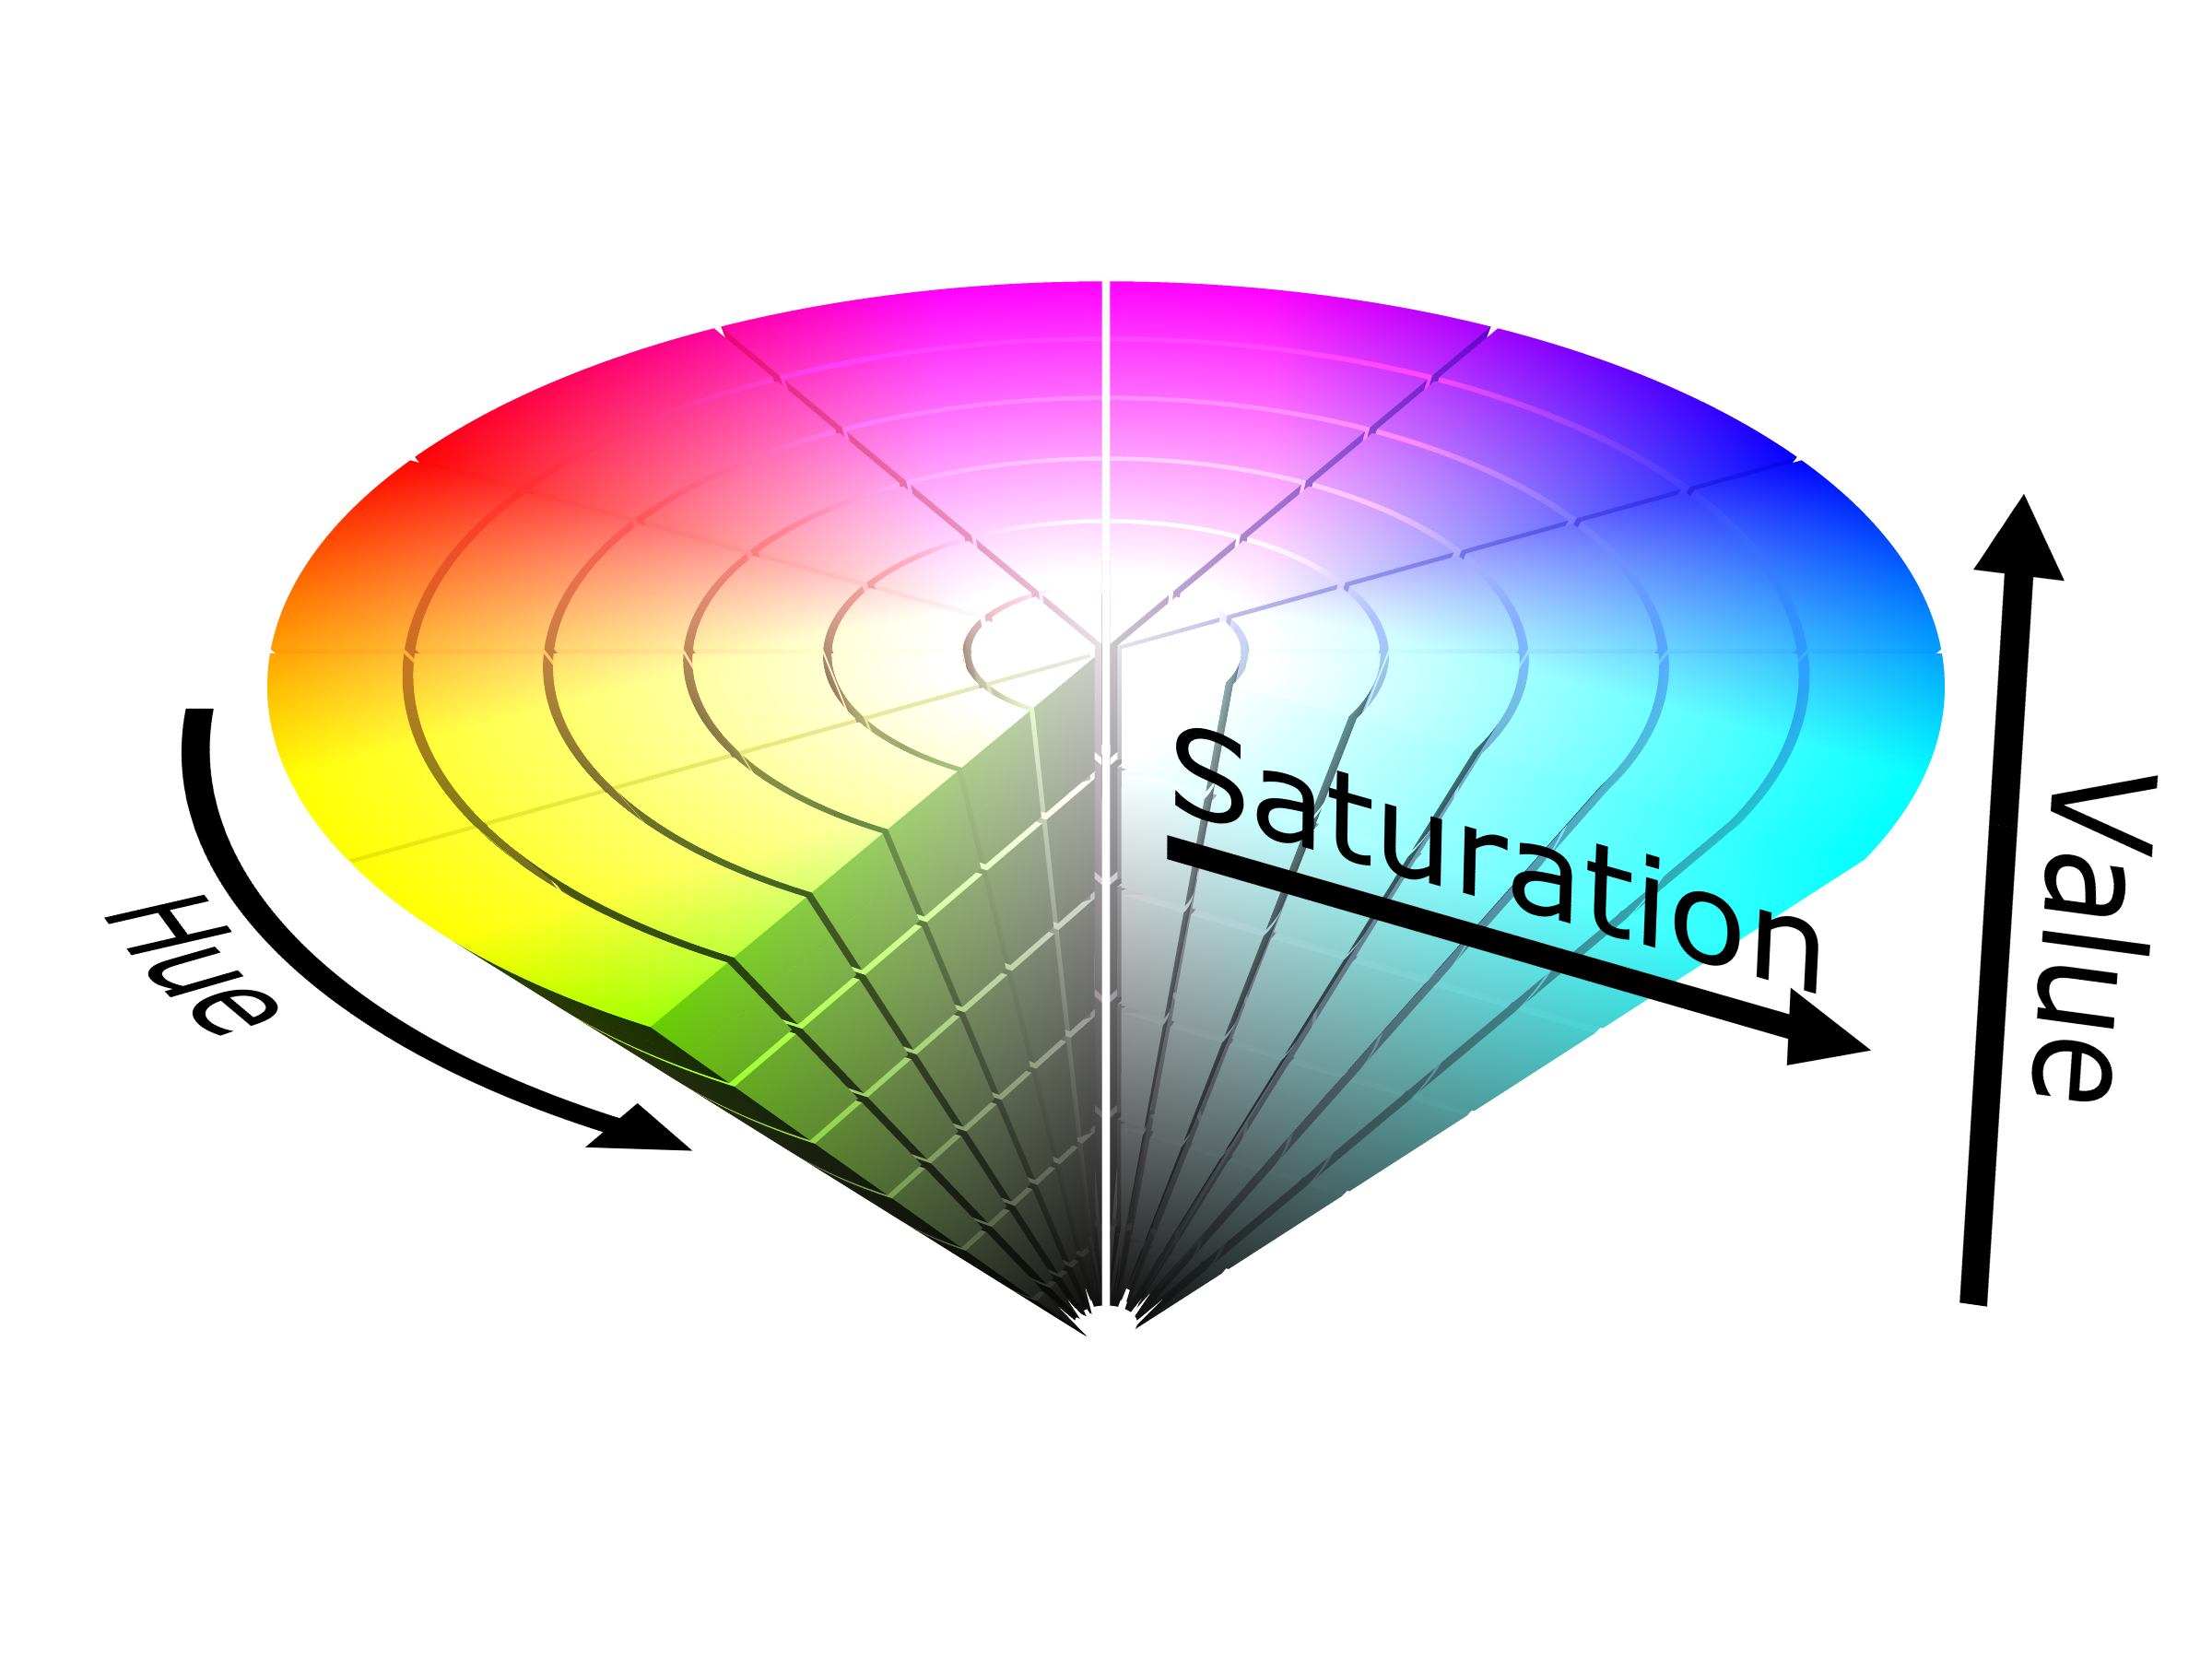

In [1]:
'''Libraries'''
import numpy as np
import cv2 as cv
import cv2
import os
import datetime
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib tk ##for interactive images in popup window 
plt.ioff() ##prevents plots getting overwritten
print("Libraries Loaded")

Libraries Loaded


In [3]:
##to detect coloured objects from picture or vedio
def nothing(x):
    pass

cap=cv2.VideoCapture(0); ## for video

cv2.namedWindow("Tracking")
cv2.createTrackbar("LH","Tracking",0,255, nothing)
cv2.createTrackbar("LS","Tracking",0,255, nothing)
cv2.createTrackbar("LV","Tracking",0,255, nothing)
cv2.createTrackbar("UH","Tracking",255,255, nothing)
cv2.createTrackbar("US","Tracking",255,255, nothing)
cv2.createTrackbar("UV","Tracking",255,255, nothing)


while True:
    _, frame= cap.read() ## for video
    #frame=cv.imread('E:/opencv-master/opencv-master/samples/data/smarties.png') ## for picture
    hsv=cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    l_h=cv.getTrackbarPos('LH','Tracking')
    l_s=cv.getTrackbarPos('LS','Tracking')
    l_v=cv.getTrackbarPos('LV','Tracking')
    u_h=cv.getTrackbarPos('UH','Tracking')
    u_s=cv.getTrackbarPos('US','Tracking')
    u_v=cv.getTrackbarPos('UV','Tracking')
    
    
    l_b=np.array([l_h,l_s,l_v]) ## threshhold hsv image for a range of blue color (lower values of blue)
    u_b=np.array([u_h,u_s,u_v]) ## (upper limit of blue color)
    mask=cv2.inRange(hsv, l_b, u_b) ## threshold hsv image to get only blue color
    res = cv2.bitwise_and(frame, frame, mask=mask) ## mask original image
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)
    
    
    k=cv2.waitKey(1)
    if k==27: ##press esc key to close all windows
        break
cap.release()
cv.destroyAllWindows()



__2. Simple Threshholding to cluster pixel__

In [4]:
##global threshold value is used 

img=cv.imread('E:/opencv-master/opencv-master/samples/data/gradient.png')
_, th1= cv.threshold(img, 50, 255,cv.THRESH_BINARY) ## THRESH_BINARY: for values less tahn zero new value assigned as 0 else 1
_, th2= cv.threshold(img, 200, 255,cv.THRESH_BINARY_INV) ## THRESH_BINARY_INV: inverse of THRESH_BINARY
_, th3= cv.threshold(img, 127, 255,cv.THRESH_TRUNC) ## THRESH_TRUNC: upto the threshhold values wont change and afterwards the pixel value will remain the threshold
_, th4= cv.threshold(img, 127, 255,cv.THRESH_TOZERO) ## THRESH_TOZERO: whenever the pixel value is lesser than zero pixel value will be assigned 0
_, th5= cv.threshold(img, 127, 255,cv.THRESH_TOZERO_INV) ## THRESH_TOZERO_INV: inverse of THRESH_TOZERO

cv.imshow("Image", img)
cv.imshow("Th5",th5)
#cv.imshow("Th4",th4)
#cv.imshow("Th3",th3)
#cv.imshow("Th2",th2)
#cv.imshow("Th1",th1)

cv.waitKey(0)
cv.destroyAllWindows()

__3. Adaptive Threshholding to cluster pixel__

In [9]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/sudoku.png',0);  ##adaptive threshold requires picture to be loaded in grayscale
cv.imshow("Image", img)
_, th1= cv.threshold(img, 127, 255,cv.THRESH_BINARY) ## THRESH_BINARY: for values less than zero new value assigned as 0 else 1
th2=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY, 11,2); 
th3=cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY, 11,2);
cv.imshow("Image", img)
#cv.imshow("Th1",th1)
cv.imshow("Th2",th2)
cv.imshow("Th3",th2)

cv.waitKey(0)
cv.destroyAllWindows()

__4. Morphological Transformation (Example 1)__

<IPython.core.display.Javascript object>


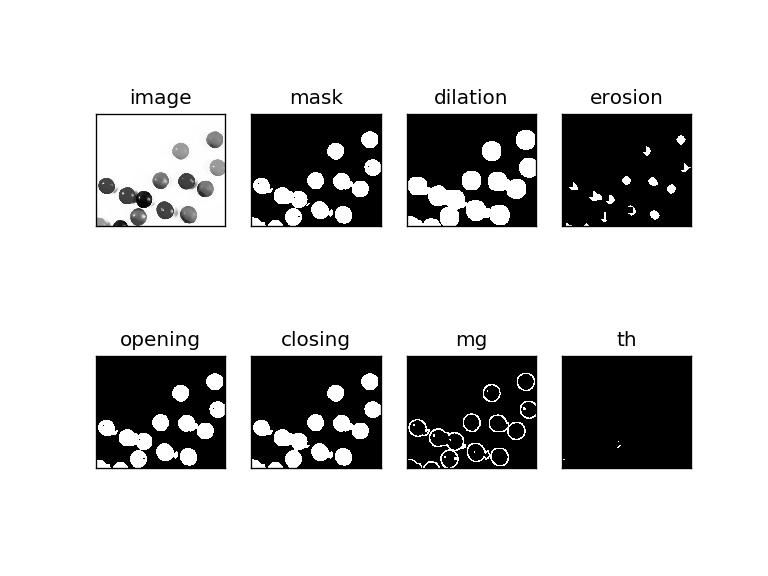

In [12]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/smarties.png',0)
_, mask= cv.threshold(img, 220, 255,cv.THRESH_BINARY_INV)

kernal=np.ones((5,5),np.uint8)# shape applied on the image (white square is used here)
dilation=cv2.dilate(mask,kernal,iterations=2) #to remove dots
erosion=cv2.erode(mask, kernal, iterations=5 ) #boundries will be eroded 
opening=cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal) # erosion followed by dialtion
closing=cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal) # reverse of opening i.e dilation followed by erosion
mg=cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal) # difference between dilation and erosion
th=cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)  # differenece between image and opening of the image


titles=['image','mask','dilation','erosion', 'opening', 'closing','mg','th']
images=[img,mask,dilation,erosion,opening,closing,mg,th]

for i in range(8):
    plt.subplot(2,4,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])  
plt.show()

__4. Morphological Transformation (Example 2)__

<IPython.core.display.Javascript object>


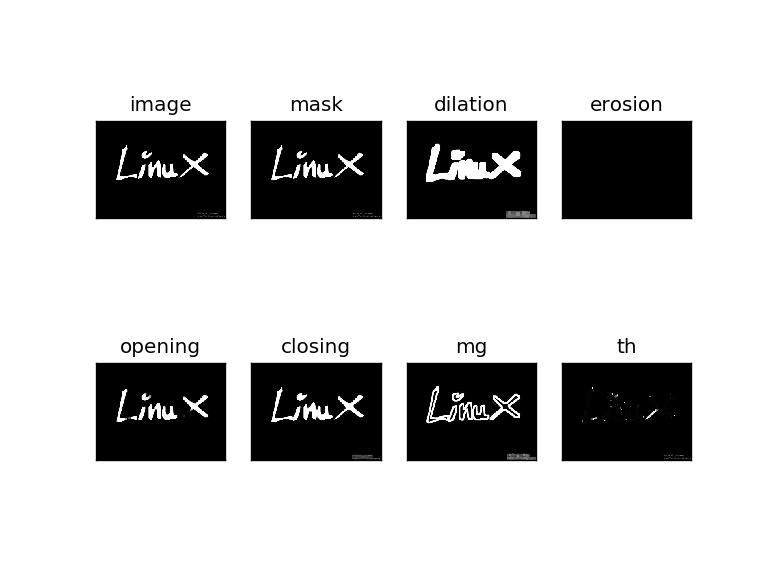

In [14]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/LinuxLogo.jpg',0)
#_, mask= cv.threshold(img, 220, 255,cv.THRESH_BINARY_INV)

kernal=np.ones((5,5),np.uint8)# shape applied on the image (white square is used here)
dilation=cv2.dilate(img,kernal,iterations=2) #to remove dots
erosion=cv2.erode(img, kernal, iterations=5 ) #boundries will be eroded 
opening=cv2.morphologyEx(img, cv2.MORPH_OPEN, kernal) # erosion followed by dialtion
closing=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernal) # reverse of opening i.e dilation followed by erosion
mg=cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernal) # difference between dilation and erosion
th=cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernal)  # differenece between image and opening of the image


titles=['image','mask','dilation','erosion', 'opening', 'closing','mg','th']
images=[img,img,dilation,erosion,opening,closing,mg,th]

for i in range(8):
    plt.subplot(2,4,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])  
plt.show()

__5. Smoothing or Blurring of Images__

<IPython.core.display.Javascript object>


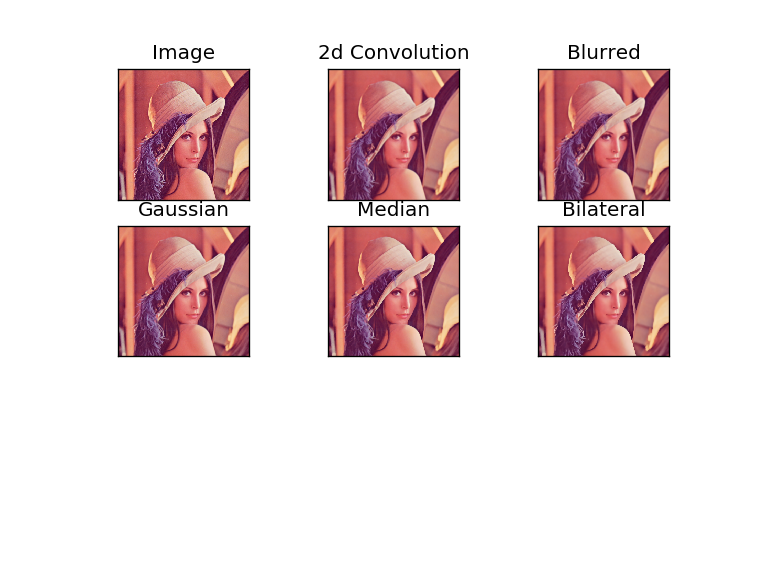

In [38]:
## used to remove noise of the images
## linear filters are commonly used
## homogenous filter: simple, each o/p pixel is the mean of its kernal neighbours, all pixels have same weight 
## LPF(low Pass Filter): removes noises and blurrs images
## HPF(High Pass Filter): finds the edges in the images
## Gaussian filter: uses different weight kernal in X and Y direction, results have heigher weight in the middle 

#img=cv.imread('E:/opencv-master/opencv-master/samples/data/opencv-logo.png') ##example 1
#img=cv.imread('E:/opencv-master/opencv-master/samples/data/download.jpg') ##image from: https://www.google.com/search?q=image+with+noise&tbm=isch&ved=2ahUKEwiT0dT1ip_qAhXFuyoKHWyqC_MQ2-cCegQIABAA&oq=image+with+noise&gs_lcp=CgNpbWcQAzICCAAyBggAEAUQHjIGCAAQBRAeMgYIABAFEB4yBggAEAgQHjIGCAAQCBAeOgQIIxAnOgUIABCxAzoECAAQQ1DxxAFYjeEBYMPiAWgAcAB4AIABYYgBlguSAQIxNpgBAKABAaoBC2d3cy13aXotaW1n&sclient=img&ei=2LT1XpOFAcX3qgHs1K6YDw&bih=529&biw=1280#imgrc=54WbUTst3XSbjM
#img=cv.imread('E:/opencv-master/opencv-master/samples/data/water.png') ##salt & pepper noise, image from: https://en.wikipedia.org/wiki/Salt-and-pepper_noise#:~:text=Salt%2Dand%2Dpepper%20noise%20is,noise%20sometimes%20seen%20on%20images.&text=This%20noise%20can%20be%20caused,filter%20or%20a%20morphological%20filter.
img=cv2.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernal=np.ones((5,5), np.float32)/25
dst=cv2.filter2D(img, -1, kernal) ##desired depth assumed as -1 ## homogenous filter
blur= cv2.blur(img, (5,5)) ##uses averaging algorithm for blurring the image
gauss=cv2.GaussianBlur(img, (5,5), 0) ##gaussian blur, sigma assumed as 0, removes high frequency noises
median=cv2.medianBlur(img, 5) #replaces with each pixel with the mean of the neighbouring pixel best for salt and pepper noise
bilateral=cv2.bilateralFilter(img, 9, 75, 75) #to preserve the edges

titles=['Image','2d Convolution', 'Blurred', 'Gaussian','Median', 'Bilateral']
images=[img,dst, blur, gauss, median, bilateral]

for i in range(6):
    plt.subplot(3,3,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])  
plt.show()

__6. Image Gradient (to identify edges)__

Image gardient is the directional change of color or intensity 

<IPython.core.display.Javascript object>


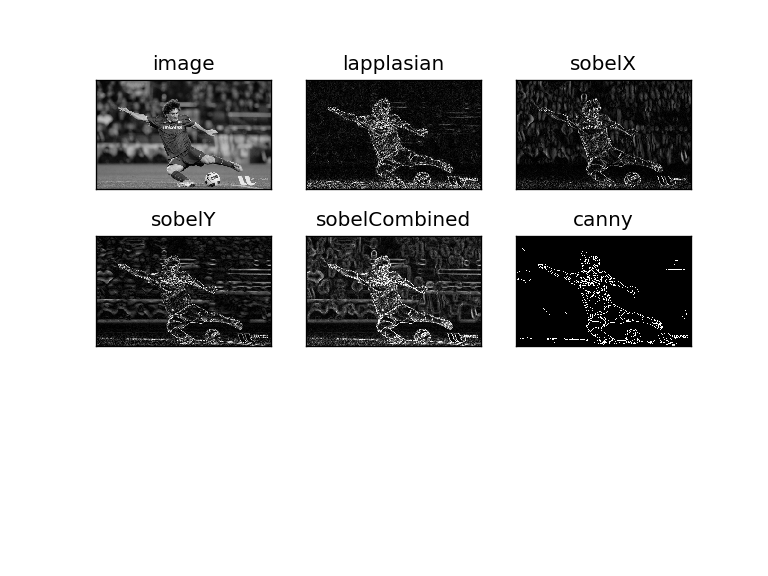

In [8]:
''' Laplassian- calculates the laplassian derivatives 
Sobel- joints differenciation and gaussian functions '''

img=cv.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',cv2.IMREAD_GRAYSCALE)
#img=cv.imread('E:/opencv-master/opencv-master/samples/data/sudoku.png',cv2.IMREAD_GRAYSCALE)

lap=cv.Laplacian(img, cv2.CV_64F, ksize=3) #CV_64F- datatype (floating for lapplasian) 
lap=np.uint8(np.absolute(lap)) #converting float to unsigned 8 bit integer

sobelX=cv.Sobel(img,cv2.CV_64F, 1, 0) #dx=1- sobelX in x direction
sobelY=cv.Sobel(img,cv2.CV_64F, 0, 1) #dy=1- sobelY in y direction
sobelX=np.uint8(np.absolute(sobelX))
sobelY=np.uint8(np.absolute(sobelY))

sobelCombined=cv.bitwise_or(sobelX,sobelY) ##sobelX and sobelY combined

canny=cv.Canny(img, 100, 200) ## (lowest noise) explained further in next cell

titles=['image','lapplasian','sobelX', 'sobelY','sobelCombined', 'canny']
images=[img, lap, sobelX, sobelY, sobelCombined, canny]

for i in range(6):
    plt.subplot(3,3,i+1), plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])  
plt.show()

 __7. Canny Edge Detector__

Canny Edge detection opertor using multi stage algorithm to detect edges. It has 5 steps:
1. Noise Reduction
2. Gradient Calculation
3. Non-maximum suppression
4. Double threshhold
5. Edge Tracking by Hyssteresis

In [10]:
''' Canny edge detector with trackbars for lower and upper threshhold '''

def nothing(x):
    pass


cv2.namedWindow("Tracking")
cv2.createTrackbar("LT","Tracking",0,300, nothing)   ## lower threshold
cv2.createTrackbar("UT","Tracking",0,300, nothing)  ## upper threshold

#canny=cv2.Canny(img, 100, 200)


while True:
    img=cv.imread('E:/opencv-master/opencv-master/samples/data/messi5.jpg',cv2.IMREAD_GRAYSCALE)
    #hsv=cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    l_t=cv.getTrackbarPos('LT','Tracking')
    u_t=cv.getTrackbarPos('UT','Tracking')
    
    canny=cv.Canny(img, l_t, u_t)
    cv.imshow("image", canny)
    k=cv.waitKey(1)
    
    if k==27: ##press esc key to close all windows
        break
        
cv.destroyAllWindows()


 __8. Image Pyramids__

Images of different resolution is created and object is searched. It is a type of multi-scale representation in which the image is subjected to repeated smoothing and subsampling. There are two types:
1. Gaussian Pyramid -Repeated filtering and sub smapling of an image 
2. Laplacian Pyramid -Formed by the difference between the levels in gaussian pyramid and expanded version of the upper levl in gaussian pyramid

They are used of blend images and reconstruction of images

In [18]:
'''Gausiian Pyramid- 2 functions
pyrDown- reducing resolution
pyrUp- increasing resolution'''

img=cv.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg')

lr1=cv.pyrDown(img)  ##lower resolution
lr2=cv.pyrDown(lr1)

hr1=cv.pyrUp(lr1)  ##higher resolution
hr2=cv.pyrUp(lr2)

cv.imshow("image", img)
cv.imshow("pyrdown 1", lr1)
cv.imshow("pyrdown 2", lr2)
cv.imshow("pyrUp 1", hr1)
cv.imshow("pyrUp 2", hr2)

cv.waitKey(0)  
cv.destroyAllWindows()

In [7]:
'''Laplassian doesnot have exclusive function - can be used for edge detection'''

img=cv.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg')
layer=img.copy()
gp=[layer]

for i in range(6):
    layer=cv.pyrDown(layer)
    gp.append(layer)
    
for i in range(5,0,-1): #start,stop,step
    gaussian_extended=cv.pyrUp(gp[i])
    laplacian=cv.subtract(gp[i-1], gaussian_extended)
    cv.imshow(str(i), laplacian)
    #print(i)
    
layer=gp[5]
cv.imshow("Upper level Gaussian Pyramid", layer)
lp=[layer]
    
cv.imshow('Original', img)
cv.waitKey(0)
cv.destroyAllWindows()

 __9. Blending images using pyramid technique__

Steps:
1. load 2 images
2. find gaussian pyramids of the 2 images
3. from gaussian find lapplassian
4. join left and right halfs of images in each levels of laplacian pyramids
5. recconstruct original image from the joint image

In [12]:
apple=cv.imread('E:/opencv-master/opencv-master/samples/data/apple.jpg')
orange=cv.imread('E:/opencv-master/opencv-master/samples/data/orange.jpg')
print(apple.shape)
print(orange.shape)
apple_orange=np.hstack((apple[:, :256], orange[:, 256:]))

##generating gaussian pyramid for apple
apple_copy=apple.copy()
gp_apple=[apple_copy]

for i in range(6):
    apple_copy=cv.pyrDown(apple_copy)
    gp_apple.append(apple_copy)
    
##generating gaussian pyramid for orange 
orange_copy=orange.copy()
gp_orange=[orange_copy]

for i in range(6):
    orange_copy=cv.pyrDown(orange_copy)
    gp_orange.append(orange_copy)
    
##generating lapllassian pyramid for apple
apple_copy=gp_apple[5]
lp_apple=[apple_copy]
for i in range(5,0,-1): #start,stop,step
    gaussian_extended_apple=cv.pyrUp(gp_apple[i])
    laplacian_apple=cv.subtract(gp_apple[i-1], gaussian_extended_apple)
    lp_apple.append(laplacian_apple)

##generating lapllassian pyramid for orange
orange_copy=gp_orange[5]
lp_orange=[orange_copy]
for i in range(5,0,-1): #start,stop,step
    orange_copy=gp_orange[5]
    gaussian_extended_orange=cv.pyrUp(gp_orange[i])
    laplacian_orange=cv.subtract(gp_orange[i-1], gaussian_extended_orange)
    lp_orange.append(laplacian_orange)
    
apple_orange_pyramid=[]
n=0
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n+=1
    cols, rows, ch=apple_lap.shape
    laplacian= np.hstack((apple_lap[:, 0:int(cols/2)], orange_lap[:, int(cols/2):]))
    apple_orange_pyramid.append(laplacian)
    
##new reconstruct
apple_orange_reconstruct= apple_orange_pyramid[0]
for i in range(1,6):
    apple_orange_reconstruct=cv.pyrUp(apple_orange_reconstruct)
    apple_orange_reconstruct=cv.add(apple_orange_pyramid[i], apple_orange_reconstruct)
    
cv.imshow('apple', apple)
cv.imshow('orange', orange)
cv.imshow('apple_orange', apple_orange)
cv.imshow('apple_orange_reconstruct', apple_orange_reconstruct)
cv.waitKey(0)
cv.destroyAllWindows()

(512, 512, 3)
(512, 512, 3)


 __10. Contours__

Countors are curves joining all contionous points along the boundary haveing the same colour or intensity. They are used for shape analysis, object analysis and object detection

In [7]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/opencv-logo.png')
imgray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret,thresh=cv.threshold(imgray, 127,255,0)

'''contours are list of numpy array x and y coordinates of the image
heirarchy contains topology information'''

contours, hierarchy=cv2.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE) 
print("Number of contours is "+str(len(contours)))
cv.drawContours(img, contours, -1, (0,255,0), 3) ## -1 to draw all the contours
cv.imshow('Image',img)
cv.imshow('Image GRAY',imgray)

cv.waitKey(0)
cv.destroyAllWindows()

Number of contours is 9


 __11. Detecting Geometric Shapes__

In [3]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/shapes.png') ##image from: https://www.google.com/url?sa=i&url=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F59926449%2Fopencv-shape-detection&psig=AOvVaw2g9n-VHzosNbZkfiGmra7U&ust=1593526135090000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCOiWp82Zp-oCFQAAAAAdAAAAABAD
img=cv.pyrDown(img) 
imgGray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
_, thresh=cv.threshold(imgGray, 240,255, cv.THRESH_BINARY)
contours,_= cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours:
    approx=cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True) ##epsilon- estimates parameter accuracy, True_represents closed contour
    cv.drawContours(img, [approx], 0, (0,0,0), 2) 
    
    '''coordinates for printing the text'''
    x=approx.ravel()[0]
    y=approx.ravel()[1]
    
    if len(approx)==3:
        cv.putText(img,"Triangle", (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx)==4:
        x,y,w,h=cv.boundingRect(approx)
        aspectRatio=float(w)/h
        if aspectRatio>=0.95 and aspectRatio<=1.05:
            cv.putText(img,"Square", (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        else:
            cv.putText(img,"Rectangle", (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
        
    elif len(approx)==5:
        cv.putText(img,"Pentagon", (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
    
    elif len(approx)==10:
        cv.putText(img,"Star", (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
    
    else:
        cv.putText(img,"Circle", (x,y), cv.FONT_HERSHEY_COMPLEX, 0.5, (0,0,0))
    
cv.imshow('Image',img) 
cv.waitKey(0)
cv.destroyAllWindows()

 __12. Histograms__

Histograms will give overall intensity distribution of pixels

<IPython.core.display.Javascript object>


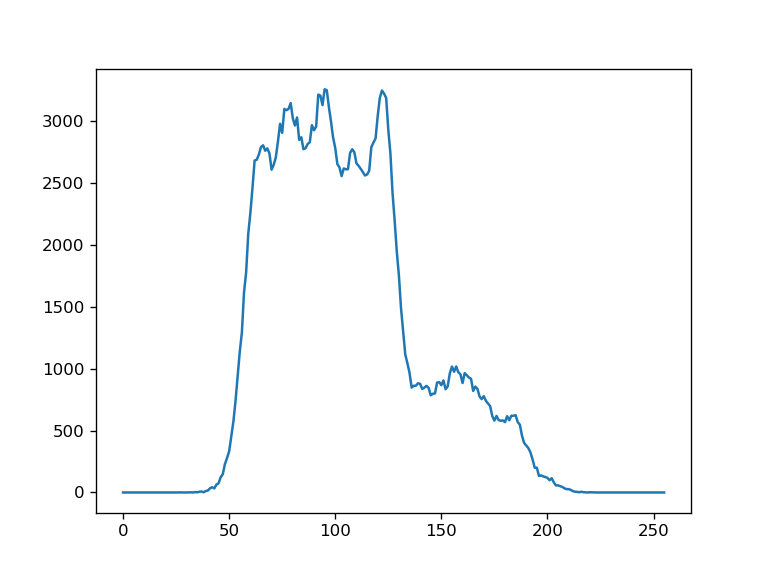

In [4]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg')

'''
img=np.zeros((200,200),np.uint8)
cv.rectangle(img, (0,100), (200,200), (256), -1)
cv.rectangle(img, (0,50), (100,100), (127), -1)
'''

hist=cv.calcHist([img],[0], None, [256], [0,256])
plt.plot(hist)

'''
b,g,r=cv.split(img)
cv.imshow("b",b)
cv.imshow("g",g)
cv.imshow("r",r)
'''

cv.imshow('Image',img) 

#plt.hist(img.ravel(), 256, (0,256)) ##shows pixel intensity
'''
plt.hist(b.ravel(), 256, (0,256))
plt.hist(g.ravel(), 256, (0,256))
plt.hist(r.ravel(), 256, (0,256))
'''
plt.show() 

cv.waitKey(0)
cv.destroyAllWindows()

 __13. a)  Hough Transform to detect lines__

It is a popular technique to detect any shape, if it can be represented mathematically. 

Here x,y cordinates are converted to line in m,c space (hough space). Each point in the x,y cordinate is represented as a line in m,c space. 
On plotting different points in a line of x,y cordinates to m,c space the lines intersect each other to a single point.
Steps are:
    1. Edge detection (Prefferably Canny Edge Detector)
    2. Mapping edge points to hoigh space and storing in an accumulator
    3. Interpretting the accumulator to yield lines of infinite length (by threshholding and possibly other constraints)
    4. Converting infinite lines to finite lines

OpenCV implimets two hough line transforms to detect lines:
1. Standard Hough Transform (HoughLines Method)
2. Probabilistic Hough Line Transform (HoughLines P Method)


In [14]:
'''Standard Hough Transform (HoughLines Method)''' #here lines goes from one end to the other end

img=cv.imread('E:/opencv-master/opencv-master/samples/data/sudoku.png')
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges=cv.Canny(img, 50, 150, apertureSize=3)
lines=cv.HoughLines(edges, 1, np.pi/180, 200) ## lines in polar coordinates 

for line in lines:
    rho, theta= line[0] # rho- distance from the coordinate (0,0) i.r top left corner of the image, theta- angle in radians
   
    '''converting polar to cartesian coordiantes'''
    a=np.cos(theta) 
    b=np.sin(theta)
    
    '''x0, y0 represents the origin or the top left corner of the image'''
    x0=a*rho 
    y0=b*rho
    
    '''lines'''
    x1=int(x0+1000*(-b))
    y1=int(y0+1000*(a))
    x2=int(x0-1000*(-b))
    y2=int(y0-1000*(a))
    cv.line(img, (x1,y1), (x2,y2), (0,0,255), 2)
    
cv.imshow('Image',img)
k=cv.waitKey(0)
cv.destroyAllWindows()

In [21]:
'''Probabilistic Hough Line Transform (HoughLines P Method)''' ##optimized hough trasform 

#img=cv.imread('E:/opencv-master/opencv-master/samples/data/road.jpg')
img=cv.imread('E:/opencv-master/opencv-master/samples/data/sudoku.png')
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges=cv.Canny(gray, 50, 150, apertureSize=3)
lines=cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10) 

for line in lines:
    x1,y1,x2,y2= line[0]
    cv.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
    
cv.imshow('Image',img)
k=cv.waitKey(0)
cv.destroyAllWindows()

 __13. b)  Hough Transform to detect circles__

In [27]:
img=cv.imread('E:/opencv-master/opencv-master/samples/data/smarties.png')

## eqn of circle: (x-xc)^2+(y-yc)^2 = r^2, where (xc,yc) are center of the circle r the radius
output=img.copy()
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray=cv.medianBlur(gray, 5)
circles=cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
detected_circles= (np.uint16(np.around(circles))) ## converts circles parameters into integer (x and y) and radius

for (x,y,r) in detected_circles[0,:]:
    cv.circle(output, (x,y), r, (0,255,0), 3)
    cv.circle(output, (x,y), 2, (0,255,255), 3)
    
    
    
cv.imshow('Output',output)
k=cv.waitKey(0)
cv.destroyAllWindows()

 __14. Facial Detection__

In [13]:
face_cascade=cv.CascadeClassifier('E:/opencv-master/opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')

img=cv.imread('E:/opencv-master/opencv-master/samples/data/lena.jpg')
gray=cv.cvtColor(img, cv.COLOR_BGR2GRAY)
faces=face_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces:
    cv.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 3)
    
cv.imshow('Image', img)
k=cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
face_cascade

<CascadeClassifier 0000012D17C49410>